# Descovering Exoplanets

The model following consist in used technique of Machine Learning over a problem of Classification


In [23]:
%matplotlib inline

# Librerias Básicas
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamientos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler

# Modelos
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Metricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, SCORERS

# Hiperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


### Extraction Data.


Lecture from Drive file

In [24]:
url='https://drive.google.com/file/d/17ZWDTVc1SuEP8jFK2RnrgkQnI8hJI84m/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dfraw = pd.read_csv(url)

DF = dfraw.copy() # Copy data raw

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6991 non-null   int64  
 1   koi_disposition    6991 non-null   object 
 2   koi_fpflag_nt      6991 non-null   int64  
 3   koi_fpflag_ss      6991 non-null   int64  
 4   koi_fpflag_co      6991 non-null   int64  
 5   koi_fpflag_ec      6991 non-null   int64  
 6   koi_period         6991 non-null   float64
 7   koi_period_err1    6991 non-null   float64
 8   koi_period_err2    6991 non-null   float64
 9   koi_time0bk        6991 non-null   float64
 10  koi_time0bk_err1   6991 non-null   float64
 11  koi_time0bk_err2   6991 non-null   float64
 12  koi_impact         6991 non-null   float64
 13  koi_impact_err1    6991 non-null   float64
 14  koi_impact_err2    6991 non-null   float64
 15  koi_duration       6991 non-null   float64
 16  koi_duration_err1  6991 


### Target


The Target is `koi_disposition`, which label the objects recorded in three categories: CONFIRMED (CF), FALSE POSITIVE (FP) y CONDIDATE (CD). 

In the following Histogram, we noted a major frequency FALSE POSITIVE 



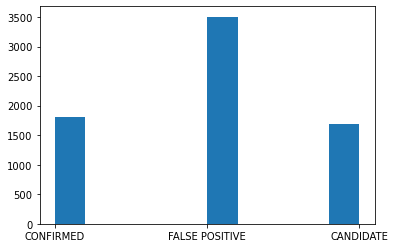

In [25]:
y = DF.koi_disposition # Target 'y' 
plt.hist(y) # Histogram
plt.show()


### Identified Variables

Regards the above, the question arises about,  which can variables is generate high amount of FP?. Faced with such 
a question, we analysed values means diferencias of the variables between CD and FP.


In [26]:
df=DF.copy()

confirmed = df[df.koi_disposition == 'CONFIRMED' ].drop(['koi_disposition'], axis =1)
falsePositive = df[df.koi_disposition == 'FALSE POSITIVE' ].drop(['koi_disposition'], axis =1)

confMean = pd.Series( confirmed.mean()) 
FPMean = pd.Series( falsePositive.mean()) 

varDiffMean =  np.round(np.absolute( (confMean - FPMean)/confMean), 2)   # with rescept data confirmed
dfMean = pd.DataFrame({'confMean':confMean, 'FPMean':FPMean, 'varDiffMean': varDiffMean})
dfMean # note that index correspond  to variables.




,confMean,FPMean,varDiffMean
Unnamed: 0,1751.602778,4297.989155,1.45
koi_fpflag_nt,0.009444,0.308505,31.67
koi_fpflag_ss,0.011667,0.476027,39.80
koi_fpflag_co,0.003333,0.403253,119.98
koi_fpflag_ec,0.000556,0.249144,447.46
koi_period,26.451343,66.103066,1.50
koi_period_err1,0.000190,0.002556,12.48
koi_period_err2,-0.000190,-0.002556,12.48
koi_time0bk,156.532602,166.012645,0.06
koi_time0bk_err1,0.004084,0.010165,1.49


In [27]:
dfMean[varDiffMean < 5].index

Index(['Unnamed: 0', 'koi_period', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_teq', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

We  noted  that exists diferencias(means) considers in certain variables, and these  will produce a high rate
of FP. Therefore, this works for us like a firts criterion to select variables, i.e, these thot differ over some tolerance value.

The values generating in the columna `varDiffMean`, correspond to  the average variation  between  the variables.
from FP to the CD.

We will adopt this criterion by `seleccion` function. 



In [28]:
def seleccion(DF, tol=10):
        df = DF.copy()
        y = df.koi_disposition # variable objetivo 'y' 
        df = df.drop(['Unnamed: 0'], axis =1) # columna rebundante


        confirmed = df[df.koi_disposition == 'CONFIRMED' ].drop(['koi_disposition'], axis =1)
        falsePositive = df[df.koi_disposition == 'FALSE POSITIVE' ].drop(['koi_disposition'], axis =1)
        
        confMean = pd.Series( confirmed.mean()) 
        FPMean = pd.Series( falsePositive.mean()) 

        varDiffMean =  np.round(np.absolute( (confMean - FPMean)/confMean), 2)   # con respecto a los datos confirmadfMeandfMean = pd.DataFrame({'confMean':confMean, 'FPMean':FPMean, 'varDiffMean': varDiffMean})
        dfMean = pd.DataFrame({'confMean':confMean, 'FPMean':FPMean, 'varDiffMean': varDiffMean})
        
        indexSel =dfMean[varDiffMean < 5].index
        X = pd.DataFrame()
        X['koi_disposition']=y 
        
        
        return X.join(df[indexSel])
    
df=seleccion(DF) # cercano al 50% de las variables



### Seleted Variables

#### Types


We noted that categorical variables is only `koi_disposition`, while all rest are numerical


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_period         6991 non-null   float64
 2   koi_time0bk        6991 non-null   float64
 3   koi_time0bk_err1   6991 non-null   float64
 4   koi_time0bk_err2   6991 non-null   float64
 5   koi_impact         6991 non-null   float64
 6   koi_impact_err2    6991 non-null   float64
 7   koi_duration       6991 non-null   float64
 8   koi_duration_err1  6991 non-null   float64
 9   koi_duration_err2  6991 non-null   float64
 10  koi_teq            6991 non-null   int64  
 11  koi_model_snr      6991 non-null   float64
 12  koi_tce_plnt_num   6991 non-null   int64  
 13  koi_steff          6991 non-null   int64  
 14  koi_steff_err1     6991 non-null   int64  
 15  koi_steff_err2     6991 non-null   int64  
 16  koi_slogg          6991 

# Missing values

In [30]:
missingValueCount = df.isnull().sum()
print('Num_null: ' , missingValueCount.sum() )

Num_null:  0


### Pre-processing

# Standarization and coding.

In [31]:
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]


numerical_transformer = Pipeline ( [('std_scaler' , StandardScaler()) # estandarizacion  
                                   ])

#('imputer' ,SimpleImputer(strategy='median')), # impute sobre datos faltantes

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
    ])



Since the machine process in a way numerical, coding categoricaal variable to numerical. Label as `Target`. Note that:

`CONFIRMED == 0`

`FALSE POSITIVE == 1`

`CANDITED == 2`


In [32]:
def label_encode(df):    
    df['target'] = df.koi_disposition.astype('category').cat.codes
    df = df.drop('koi_disposition', axis=1)
    return df

df=label_encode(df)

# Model

### Data Train and test

In [33]:
train , test = train_test_split(df , test_size = 0.2, random_state = 42 )
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [34]:
Xtrain = train.drop('target', axis=1)
Ytrain = train['target'].copy()



Xtest = test.drop('target', axis=1)
Ytest = test['target'].copy()



In [35]:

### Notamos que al escalar el modelo con hiperparametros optimizados no se obtienen buenos resultados, 
### implica que se debe realizar una mejor busqueda, ejemplo utilizando 'OPTUNA'  cuando las variables estar 
### normalizadas y/0 su defecto, ubicar algun error el
### procedimiento, por tanto el analisis siguiente se realizara sin el standarScaler()


df_train = preprocessor.fit_transform(Xtrain)  
df_test = preprocessor.fit_transform(Xtest)  




It will use  `RandomForesForestClassifier`.

In [36]:
model = RandomForestClassifier(random_state=0)

model.fit(df_train, Ytrain)


Ypred = model.predict(df_test)


The metric will be  `f1_score`, which combine two metrics of classification `precision` y `recall`.



In [37]:
score = f1_score(
    Ytest,
    Ypred,
 #   labels=labels,
    average='micro',
)



print('F1_score:',score)

F1_score: 0.7455325232308792


# Optimization


###  Hiperparameters

In [ ]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}
clf=GridSearchCV( model , grid,
                cv=5,  scoring='f1_micro' , return_train_score=True) # arg (model , distri , ...)

clf.fit(df_train, Ytrain)


clf.best_params_

In [ ]:
randomgrid = { 
    'n_estimators': [200,300,400,500, 600, 700],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,8,10,15, 20, 23],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18,6]
}
clf=RandomizedSearchCV( model , grid,
                cv=10,  scoring='f1_micro' , return_train_score=True) # arg (model , distri , ...)

clf.fit(df_train, Ytrain)


clf.best_params_

###  Re-training

In [ ]:
paramsBest= clf.best_params_

ModelCLF=clf.best_estimator_
YpredCLF=ModelCLF.predict(df_test)




score = f1_score(
    Ytest,
    YpredCLF,
 #   labels=labels,
    average='micro',
)

score

# Model Evaluation


### Metrics


Other metrics for analytics are `precision_score` and `recall_score`,  which  showing the fellowing results:


In [ ]:
labels= ModelCLF.classes_


precision = precision_score(
    Ytest,
    YpredCLF,
    labels=labels,
    average='macro',
)
recall = recall_score(
    Ytest,
    Ypred,    
    labels=labels,
    average='macro',
)

print('precion_score:', precision , '\n'
     'recall:' , recall)

### Confusion Matrix 

Confusion Matrix is a metric have a good visualization, further  easily implemented over model. If its values are close to 1, better effectively.



In [ ]:
cmat = confusion_matrix(
    Ytest,
    YpredCLF,
    labels=labels,
)

cmat = (cmat.T / cmat.sum(axis=1)).T # normalize


disp = ConfusionMatrixDisplay(confusion_matrix=cmat,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

